In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt


train_path = 'data/train.parquet'
test_path = 'data/test.parquet'

con = duckdb.connect()

In [2]:
sample = con.query(f"""(SELECT * FROM parquet_scan('{train_path}') LIMIT 10)""").df()

str(list(sample.columns))

"['id', 'buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles', 'protein_name', 'binds']"

In [3]:
sample

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,0,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,BRD4,0
1,1,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,HSA,0
2,2,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,sEH,0
3,3,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,BRD4,0
4,4,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,HSA,0
5,5,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,sEH,0
6,6,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,BRD4,0
7,7,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,HSA,0
8,8,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,sEH,0
9,9,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C=C(C)C(=O)NCCN.Cl,C#CCOc1ccc(CNc2nc(NCCNC(=O)C(=C)C)nc(N[C@@H](C...,BRD4,0


In [4]:
binds_stats = con.query(f"""(SELECT binds, count(*) as binds_count FROM parquet_scan('{train_path}') GROUP BY binds ORDER BY count(*) DESC)""").df()
binds_stats

,binds,binds_count
0,0,293656924
1,1,1589906


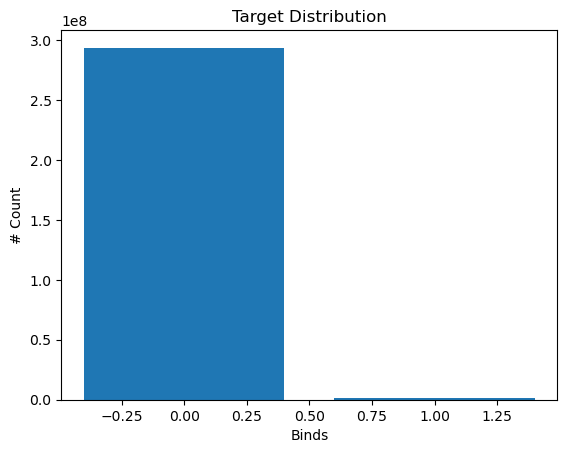

In [5]:
plt.bar(binds_stats['binds'], binds_stats['binds_count'])
plt.xlabel('Binds')
plt.ylabel('# Count')
plt.title('Target Distribution')
plt.show()

In [6]:
protein_stats = con.query(f"""(SELECT protein_name, count(*) as protein_name_count FROM parquet_scan('{train_path}') GROUP BY protein_name ORDER BY count(*) DESC)""").df()
protein_stats

,protein_name,protein_name_count
0,HSA,98415610
1,sEH,98415610
2,BRD4,98415610


In [ ]:
protein_stats = con.query(f"""(SELECT protein_name, count(distinct molecule_smiles) as protein_name_count FROM parquet_scan('{train_path}') GROUP BY protein_name ORDER BY count(*) DESC)""").df()
protein_stats

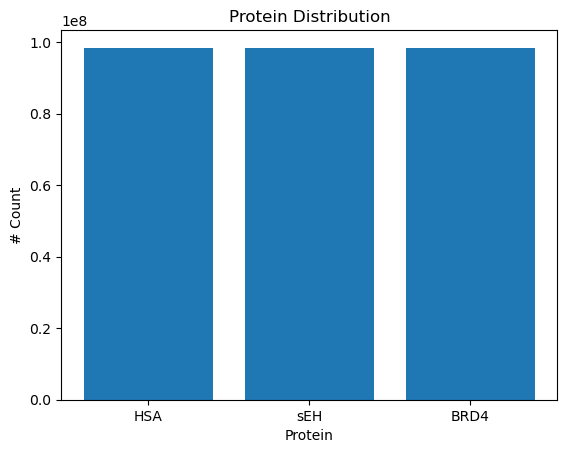

In [8]:
plt.bar(protein_stats['protein_name'], protein_stats['protein_name_count'])
plt.xlabel('Protein')
plt.ylabel('# Count')
plt.title('Protein Distribution')
plt.show()

In [9]:
protein_binds_stats = con.query(f"""(SELECT protein_name, binds, count(*) as protein_name_count FROM parquet_scan('{train_path}') GROUP BY protein_name, binds ORDER BY count(*) DESC)""").df()
protein_binds_stats

,protein_name,binds,protein_name_count
0,HSA,0,98007200
1,BRD4,0,97958646
2,sEH,0,97691078
3,sEH,1,724532
4,BRD4,1,456964
5,HSA,1,408410


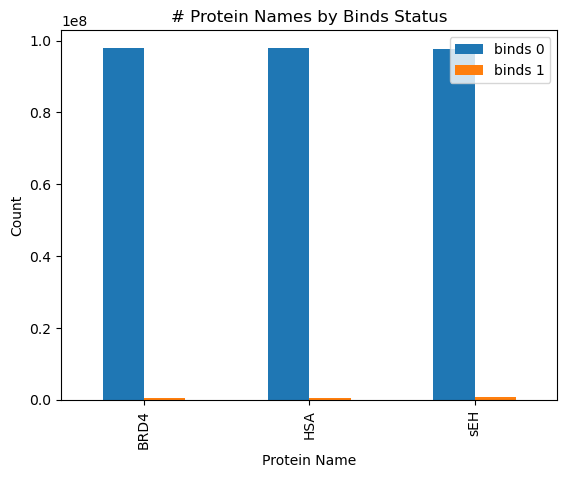

In [10]:
grouped = protein_binds_stats.groupby(['protein_name', 'binds']).sum().unstack('binds')
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Protein Name')
plt.ylabel('Count')
plt.title('# Protein Names by Binds Status')
plt.legend(labels=['binds 0', 'binds 1'])
plt.show()

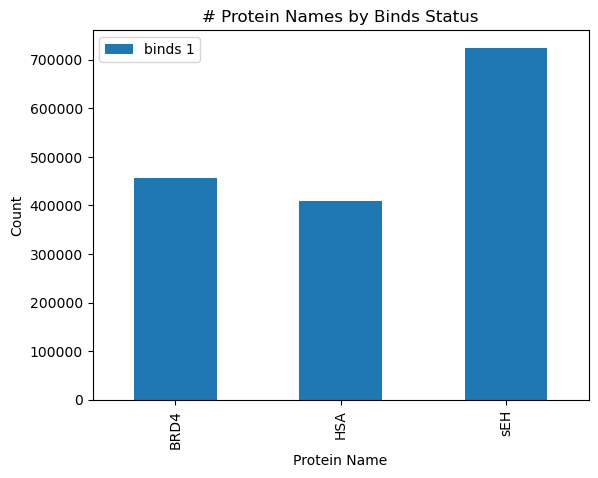

In [11]:
grouped = protein_binds_stats[protein_binds_stats['binds']==1].groupby(['protein_name', 'binds']).sum().unstack('binds')
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Protein Name')
plt.ylabel('Count')
plt.title('# Protein Names by Binds Status')
plt.legend(labels=['binds 1'])
plt.show()

In [12]:
buildingblock1_smiles_stats = con.query(f"""(SELECT buildingblock1_smiles, count(*) as buildingblock1_smiles_count FROM parquet_scan('{train_path}') GROUP BY buildingblock1_smiles ORDER BY count(*) DESC)""").df()
buildingblock1_smiles_stats

,buildingblock1_smiles,buildingblock1_smiles_count
0,O=C(N[C@H]1CC[C@@H](C(=O)O)C1)OCC1c2ccccc2-c2c...,1090407
1,O=C(O)[C@H]1CCN1C(=O)OCC1c2ccccc2-c2ccccc21,1090380
2,O=C(N[C@@H]1CC[C@H](C(=O)O)C1)OCC1c2ccccc2-c2c...,1090368
3,O=C(N[C@@H](CC1CC1)C(=O)O)OCC1c2ccccc2-c2ccccc21,1090362
4,O=C(O)C1CN(C(=O)OCC2c3ccccc3-c3ccccc32)C1,1090329
...,...,...
266,O=C(O)CC1(CNC(=O)OCC2c3ccccc3-c3ccccc32)CCCCC1,1087461
267,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2...,1087428
268,O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,1087392
269,O=C(N[C@@H](Cc1ccco1)C(=O)O)OCC1c2ccccc2-c2ccc...,1087374


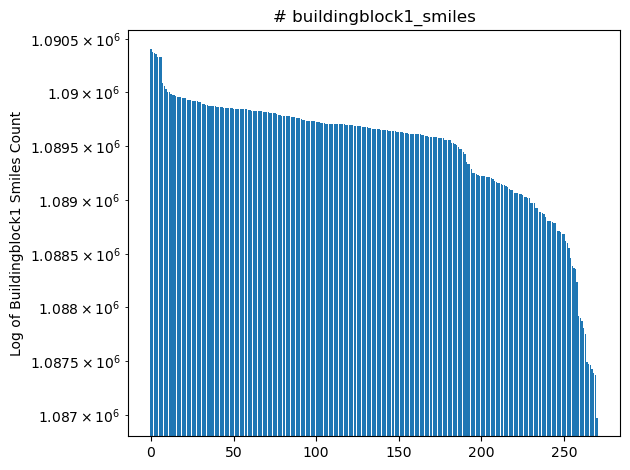

In [13]:
plt.bar(buildingblock1_smiles_stats.index, buildingblock1_smiles_stats['buildingblock1_smiles_count'])
plt.yscale('log')
plt.ylabel('Log of Buildingblock1 Smiles Count')
plt.title('# buildingblock1_smiles')
plt.tight_layout()
plt.show()

In [14]:
buildingblock1_smiles_1_stats = con.query(f"""(SELECT buildingblock1_smiles, count(*) as buildingblock1_smiles_count FROM parquet_scan('{train_path}') WHERE binds=1 GROUP BY buildingblock1_smiles ORDER BY count(*) DESC)""").df()
buildingblock1_smiles_1_stats

,buildingblock1_smiles,buildingblock1_smiles_count
0,O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,260846
1,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2...,164425
2,CC(C)CC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,36478
3,CC(OC(C)(C)C)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(...,32566
4,O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,30457
...,...,...
266,O=C(Nc1c(Cl)c(Cl)nc(C(=O)O)c1Cl)OCC1c2ccccc2-c...,55
267,O=C(Nc1cc(Cl)nc(C(=O)O)c1Cl)OCC1c2ccccc2-c2ccc...,51
268,O=C(Nc1c(Br)cc(C(=O)O)cc1Br)OCC1c2ccccc2-c2ccc...,45
269,O=C(Nc1cc(Cl)ncc1C(=O)O)OCC1c2ccccc2-c2ccccc21,21


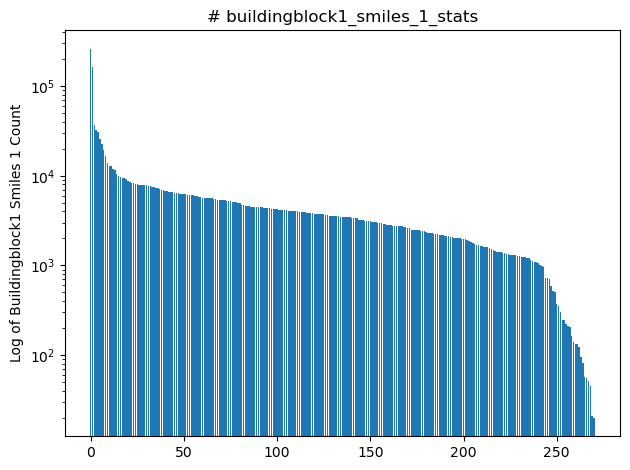

In [15]:
plt.bar(buildingblock1_smiles_1_stats.index, buildingblock1_smiles_1_stats['buildingblock1_smiles_count'])
plt.yscale('log')
plt.ylabel('Log of Buildingblock1 Smiles 1 Count')
plt.title('# buildingblock1_smiles_1_stats')
plt.tight_layout()
plt.show()

In [16]:
buildingblock2_smiles_stats = con.query(f"""(SELECT buildingblock2_smiles, count(*) as buildingblock2_smiles_count FROM parquet_scan('{train_path}') GROUP BY buildingblock2_smiles ORDER BY count(*) DESC)""").df()
buildingblock2_smiles_stats

,buildingblock2_smiles,buildingblock2_smiles_count
0,NCc1ccccn1,706092
1,Cl.NCc1cnc2n1CCOC2,704376
2,NCc1c(F)cccc1N1CCCC1,703830
3,CC1(CCCCN)OCCO1,703320
4,Nc1cccc2cnccc12,702201
...,...,...
688,CN(Cc1ccco1)Cc1ccccc1CN,149202
689,COc1ccnc(N)c1,148164
690,Nc1cncc(F)c1,147363
691,Cl.NCc1ccc[nH]1,146751


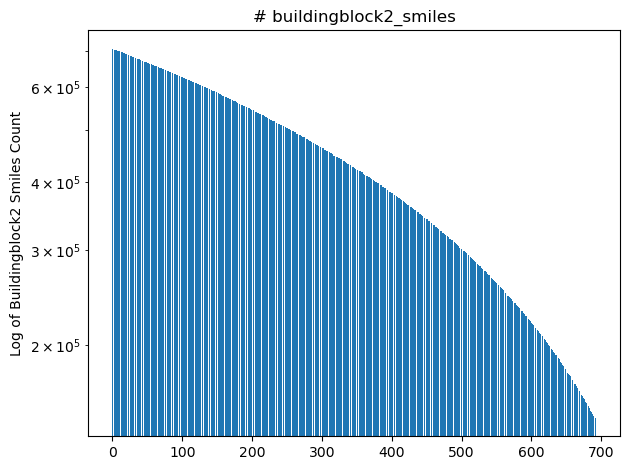

In [17]:
plt.bar(buildingblock2_smiles_stats.index, buildingblock2_smiles_stats['buildingblock2_smiles_count'])
plt.yscale('log')
plt.ylabel('Log of Buildingblock2 Smiles Count')
plt.title('# buildingblock2_smiles')
plt.tight_layout()
plt.show()

In [18]:
buildingblock2_smiles_1_stats = con.query(f"""(SELECT buildingblock2_smiles, count(*) as buildingblock2_smiles_count_1 FROM parquet_scan('{train_path}') WHERE binds=1 GROUP BY buildingblock2_smiles ORDER BY count(*) DESC)""").df()
buildingblock2_smiles_1_stats

,buildingblock2_smiles,buildingblock2_smiles_count_1
0,Cl.Cl.NCc1cncc(F)c1,64213
1,Nc1cc(N2CCNCC2)ccc1[N+](=O)[O-],56276
2,Cl.NCc1cnc2n1CCOC2,30862
3,NCCC1CSC1,28190
4,CCOC(=O)c1ncccc1N,26121
...,...,...
688,Cl.Nc1ccc2cccnc2c1,226
689,Cl.NCC1CC12CCOCC2,212
690,Nc1ccc2cc(Br)ccc2c1,160
691,C=C(C)C(=O)NCCN.Cl,122


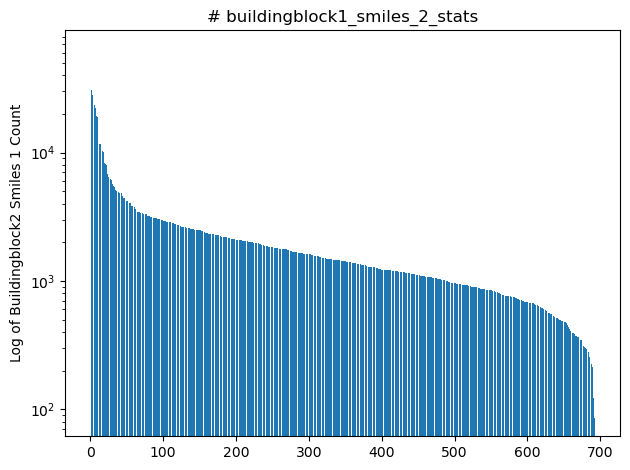

In [19]:
plt.bar(buildingblock2_smiles_1_stats.index, buildingblock2_smiles_1_stats['buildingblock2_smiles_count_1'])
plt.yscale('log')
plt.ylabel('Log of Buildingblock2 Smiles 1 Count')
plt.title('# buildingblock1_smiles_2_stats')
plt.tight_layout()
plt.show()

In [20]:
buildingblock3_smiles_stats = con.query(f"""(SELECT buildingblock3_smiles, count(*) as buildingblock3_smiles_count FROM parquet_scan('{train_path}') GROUP BY buildingblock3_smiles ORDER BY count(*) DESC)""").df()
buildingblock3_smiles_stats

,buildingblock3_smiles,buildingblock3_smiles_count
0,NCCc1nccc(C2CC2)n1,562191
1,COc1ccc2nnc(CN)n2n1,562164
2,NCc1cnc(N2CCOCC2)c(F)c1,562098
3,CCOC(=O)c1coc(N)n1,562023
4,Nc1nc2ccccc2[nH]1,562005
...,...,...
867,NCc1c(F)cccc1N1CCCC1,4062
868,Nc1nc(-c2ccc(F)cc2)cs1,2985
869,Cl.NCc1cnc2n1CCOC2,2376
870,CC1(CCCCN)OCCO1,1626


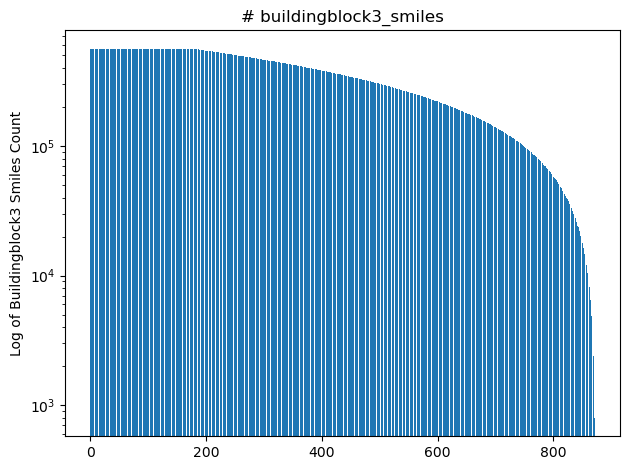

In [21]:
plt.bar(buildingblock3_smiles_stats.index, buildingblock3_smiles_stats['buildingblock3_smiles_count'])
plt.yscale('log')
plt.ylabel('Log of Buildingblock3 Smiles Count')
plt.title('# buildingblock3_smiles')
plt.tight_layout()
plt.show()

In [22]:
buildingblock3_smiles_1_stats = con.query(f"""(SELECT buildingblock3_smiles, count(*) as buildingblock3_smiles_count_1 FROM parquet_scan('{train_path}') WHERE binds=1 GROUP BY buildingblock3_smiles ORDER BY count(*) DESC)""").df()
buildingblock3_smiles_1_stats

,buildingblock3_smiles,buildingblock3_smiles_count_1
0,Cc1cc2cc(CN)ccc2[nH]1,58844
1,Cl.Cn1cc(N)ccc1=O,34174
2,Cl.Cl.NCc1cncc(F)c1,22707
3,Nc1ccc2c(c1)CNC2=O,16993
4,Cl.NCC12CC3CC(CC(C3)C1)C2,15130
...,...,...
866,Cl.Cl.NCC1CCNC(=O)C1,30
867,Cl.N#CC1(NC(=O)CN)CC1,26
868,Nc1ncccc1CO,23
869,Nc1ccc(O)cn1,13


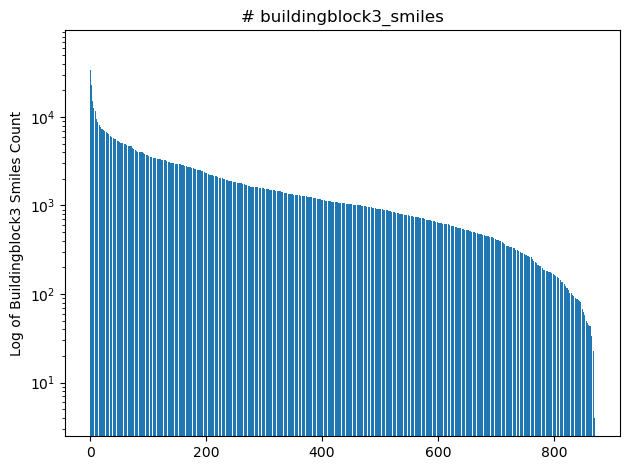

In [23]:
plt.bar(buildingblock3_smiles_1_stats.index, buildingblock3_smiles_1_stats['buildingblock3_smiles_count_1'])
plt.yscale('log')
plt.ylabel('Log of Buildingblock3 Smiles Count')
plt.title('# buildingblock3_smiles')
plt.tight_layout()
plt.show()

In [24]:
con.query(f"""(SELECT buildingblock3_smiles FROM parquet_scan('{train_path}'))
              EXCEPT
              (SELECT buildingblock3_smiles FROM parquet_scan('{train_path}') WHERE binds=1)
        """).df()

,buildingblock3_smiles
0,NCc1ccccn1


In [25]:
con.query(f"""(SELECT count(*) as molecule_smiles FROM (SELECT distinct molecule_smiles FROM parquet_scan('{train_path}')) as t)""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,molecule_smiles
0,98415610


In [26]:
con.query(f"""(SELECT count(*) as molecule_smiles_1 FROM (SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') WHERE binds=1) as t)""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,molecule_smiles_1
0,1509779


In [27]:
con.query(f"""(SELECT count(*) as molecule_smiles_common from (
              (SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') WHERE binds=0 )
              INTERSECT
              (SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') WHERE binds=1 ) ) as t)
        """).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,molecule_smiles_common
0,1509717


In [28]:
con.query(f"""(SELECT count(*) as new_molecule_smiles_as_binds_0 from (
              (SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') WHERE binds=0 )
              EXCEPT
              (SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') WHERE binds=1 ) ) as t)
        """).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,new_molecule_smiles_as_binds_0
0,96905831


In [29]:
con.query(f"""(SELECT count(*) as new_molecule_smiles_as_binds_1 from (
              (SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') WHERE binds=1 )
              EXCEPT
              (SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') WHERE binds=0 ) ) as t)
        """).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,new_molecule_smiles_as_binds_1
0,62


In [30]:
con.query(f"""(SELECT * from (
              (SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') WHERE binds=1 )
              EXCEPT
              (SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') WHERE binds=0 ) ) as t)
        """).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,molecule_smiles
0,COc1cc(C#N)c(F)cc1Nc1nc(NCc2ccc3[nH]c(C)cc3c2)...
1,Cc1cc2cc(CNc3nc(NCCC(C)S(C)=O)nc(NC(CC(C)C)C(=...
2,CCC(C)C(Nc1nc(NCc2ccc3[nH]c(C)cc3c2)nc(Nc2ccc(...
3,COC(=O)c1cncc(Nc2nc(NCc3ccc(CN4CCCC4=O)cc3)nc(...
4,Cc1cc2cc(CNc3nc(Nc4cc(Cl)c(O)c(Cl)c4)nc(NC(CC(...
...,...
57,Cc1cc(Nc2nc(NCC3CN4CCN3CC4)nc(Nc3cc(Cl)cc(C(=O...
58,O=C(N[Dy])C(Cc1ccccc1)Nc1nc(NCCC2CSC2)nc(Nc2cc...
59,Cc1cc(Nc2nc(NCC3CN4CCN3CC4)nc(N[C@H](CC(=O)N[D...
60,Cc1cc2cc(CNc3nc(NCCNC(=O)c4ccccc4F)nc(Nc4ccc(C...


In [31]:
con.query(f"""(SELECT count(*) as all_buildingblock_smiles_count FROM (SELECT distinct buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles FROM parquet_scan('{train_path}')) as t)""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,all_buildingblock_smiles_count
0,98415610


In [32]:
# 270 x 692 x 871
f"{98415610/163764216*100:.2f}%"

'60.10%'

In [33]:
binds_stats = con.query(f"""(SELECT count(*) as binds_count FROM parquet_scan('{test_path}') ORDER BY count(*) DESC)""").df()
binds_stats

,binds_count
0,1674896


In [34]:
protein_stats = con.query(f"""(SELECT protein_name, count(*) as protein_name_count FROM parquet_scan('{test_path}') GROUP BY protein_name ORDER BY count(*) DESC)""").df()
protein_stats

,protein_name,protein_name_count
0,BRD4,558859
1,sEH,558142
2,HSA,557895


In [35]:
protein_stats = con.query(f"""(SELECT protein_name, count(distinct molecule_smiles) as protein_name_count FROM parquet_scan('{test_path}') GROUP BY protein_name ORDER BY count(*) DESC)""").df()
protein_stats

,protein_name,protein_name_count
0,BRD4,558859
1,sEH,558142
2,HSA,557895


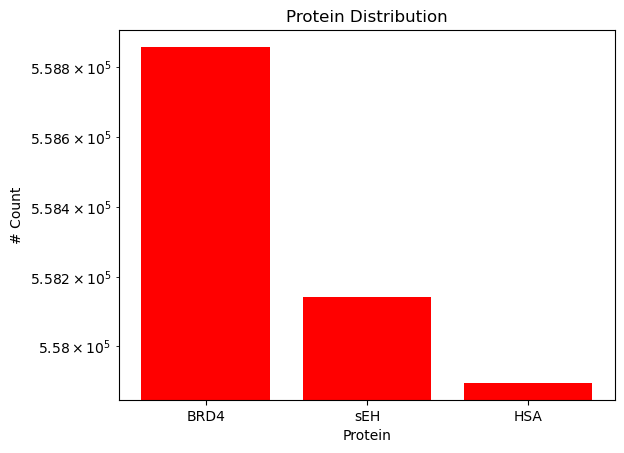

In [36]:
plt.bar(protein_stats['protein_name'], protein_stats['protein_name_count'], color='red')
plt.yscale('log')
plt.xlabel('Protein')
plt.ylabel('# Count')
plt.title('Protein Distribution')
plt.show()

In [37]:
buildingblock1_smiles_stats = con.query(f"""(SELECT buildingblock1_smiles, count(*) as buildingblock1_smiles_count FROM parquet_scan('{test_path}') GROUP BY buildingblock1_smiles ORDER BY count(*) DESC)""").df()
buildingblock1_smiles_stats

,buildingblock1_smiles,buildingblock1_smiles_count
0,O=C(N[C@@H]1CCN(c2cc(C(=O)O)cc(Cl)n2)C1)OCC1c2...,14098
1,O=C(NC1CN(c2cc(C(=O)O)cc(Cl)n2)C1)OCC1c2ccccc2...,14064
2,CC(C)(C)OC(=O)N1CCC(C(=O)O)(c2cccc(Br)c2)CC1,14041
3,O=C(O)[C@@H]1C=C(c2ccnc(Br)c2)CN1C(=O)OCC1c2cc...,14039
4,O=C(O)[C@@H]1CN(C(=O)OCC2c3ccccc3-c3ccccc32)C[...,14004
...,...,...
336,O=C(Nc1cc(Cl)c(C(=O)O)cn1)OCC1c2ccccc2-c2ccccc21,1989
337,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,1989
338,O=C(NC1(C(=O)O)Cc2ccccc2C1)OCC1c2ccccc2-c2ccccc21,1989
339,O=C(O)C[C@H](Cc1csc2ccccc12)NC(=O)OCC1c2ccccc2...,1989


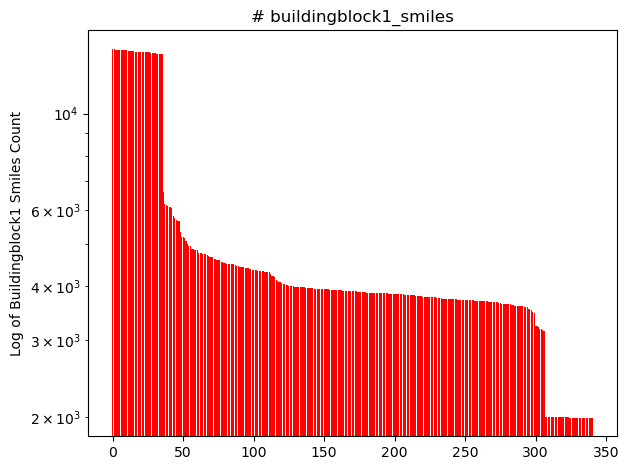

In [38]:
plt.bar(buildingblock1_smiles_stats.index, buildingblock1_smiles_stats['buildingblock1_smiles_count'], color='red')
plt.yscale('log')
plt.ylabel('Log of Buildingblock1 Smiles Count')
plt.title('# buildingblock1_smiles')
plt.tight_layout()
plt.show()

In [39]:
buildingblock2_smiles_stats = con.query(f"""(SELECT buildingblock2_smiles, count(*) as buildingblock2_smiles_count FROM parquet_scan('{test_path}') GROUP BY buildingblock2_smiles ORDER BY count(*) DESC)""").df()
buildingblock2_smiles_stats

,buildingblock2_smiles,buildingblock2_smiles_count
0,Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],14637
1,Nc1cccc2ocnc12,10161
2,CN1C(=O)Cc2cc(CN)ccc21.Cl,10077
3,Nc1nc(-c2cccnc2)cs1,8031
4,Nc1ccc2[nH]c(=O)[nH]c2c1,7302
...,...,...
1135,COC(=O)c1cc(Cl)sc1N,204
1136,Cc1ccc(N)cn1,153
1137,CC1(C)CCCC1(O)CN,153
1138,Cl.NC[C@@H]1C[C@H]1C1CCC1,102


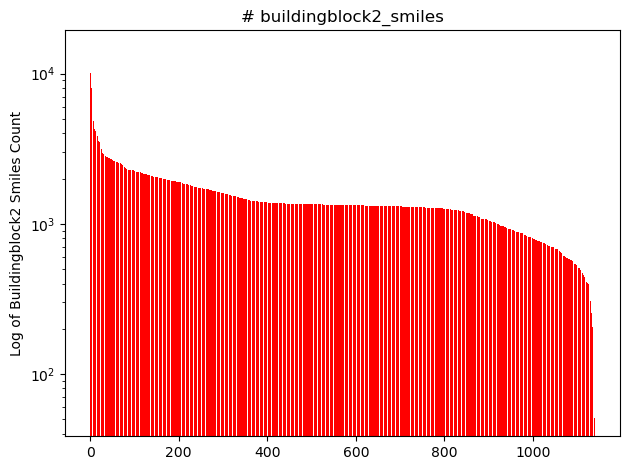

In [40]:
plt.bar(buildingblock2_smiles_stats.index, buildingblock2_smiles_stats['buildingblock2_smiles_count'], color='red')
plt.yscale('log')
plt.ylabel('Log of Buildingblock2 Smiles Count')
plt.title('# buildingblock2_smiles')
plt.tight_layout()
plt.show()

In [41]:
buildingblock3_smiles_stats = con.query(f"""(SELECT buildingblock3_smiles, count(*) as buildingblock3_smiles_count FROM parquet_scan('{test_path}') GROUP BY buildingblock3_smiles ORDER BY count(*) DESC)""").df()
buildingblock3_smiles_stats

,buildingblock3_smiles,buildingblock3_smiles_count
0,Cl.Cl.NCCc1nnc2c(=O)[nH]ccn12,10323
1,Cc1nn(C)c2ncc(CN)cc12.Cl,8481
2,NCC1CN2CCN1CC2,8361
3,Nc1ccc2[nH]c(=O)[nH]c2c1,6714
4,Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],6426
...,...,...
1384,Cl.Cl.NCc1cnsc1,15
1385,Cl.NCC1Cc2ccccc2C1,9
1386,Cl.N#CC1(NC(=O)CN)CC1,6
1387,Nc1cccc2cnccc12,3


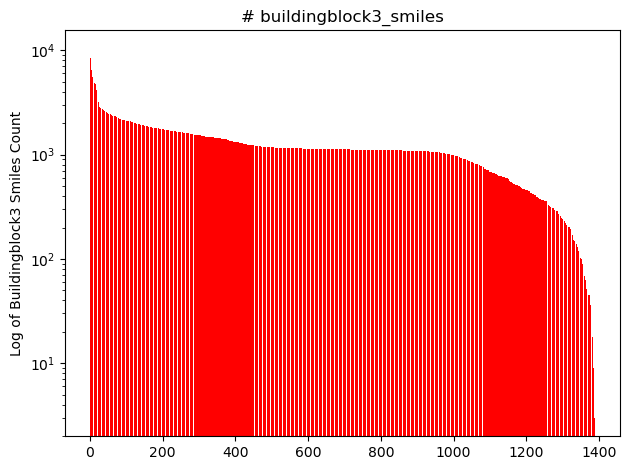

In [42]:
plt.bar(buildingblock3_smiles_stats.index, buildingblock3_smiles_stats['buildingblock3_smiles_count'], color='red')
plt.yscale('log')
plt.ylabel('Log of Buildingblock3 Smiles Count')
plt.title('# buildingblock3_smiles')
plt.tight_layout()
plt.show()

In [43]:
con.query(f"""(SELECT count(*) as molecule_smiles FROM (SELECT distinct molecule_smiles FROM parquet_scan('{test_path}')) as t)""").df()

,molecule_smiles
0,878022


In [44]:
con.query(f"""(SELECT count(*) as all_buildingblock_smiles_count FROM (SELECT distinct buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles FROM parquet_scan('{test_path}')) as t)""").df()

,all_buildingblock_smiles_count
0,878022


In [45]:
con.query(f"""(SELECT count(*) as all_buildingblock_smiles_count FROM (
    SELECT distinct buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles FROM parquet_scan('{test_path}')
    INTERSECT
    SELECT distinct buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles FROM parquet_scan('{train_path}')
    ) as t)""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,all_buildingblock_smiles_count
0,0


In [46]:
con.query(f"""(SELECT count(*) as all_buildingblock_smiles_count FROM (
    SELECT distinct molecule_smiles FROM parquet_scan('{test_path}')
    INTERSECT
    SELECT distinct molecule_smiles FROM parquet_scan('{train_path}')
    ) as t)""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,all_buildingblock_smiles_count
0,0


In [47]:
con.query(f"""(SELECT count(*) as all_buildingblock_smiles_count FROM (
    SELECT distinct buildingblock1_smiles FROM parquet_scan('{test_path}')
    INTERSECT
    SELECT distinct buildingblock1_smiles FROM parquet_scan('{train_path}')
    ) as t)""").df()

,all_buildingblock_smiles_count
0,271


In [48]:
con.query(f"""(SELECT count(*) as all_buildingblock_smiles_count FROM (
    SELECT distinct buildingblock1_smiles FROM parquet_scan('{train_path}')
    EXCEPT
    SELECT distinct buildingblock1_smiles FROM parquet_scan('{test_path}')
    ) as t)""").df()

,all_buildingblock_smiles_count
0,0


In [49]:
con.query(f"""(SELECT count(*) as all_buildingblock_smiles_count FROM (
    SELECT distinct buildingblock2_smiles FROM parquet_scan('{test_path}')
    INTERSECT
    SELECT distinct buildingblock2_smiles FROM parquet_scan('{train_path}')
    ) as t)""").df()

,all_buildingblock_smiles_count
0,693


In [50]:
con.query(f"""(SELECT count(*) as all_buildingblock_smiles_count FROM (
    SELECT distinct buildingblock2_smiles FROM parquet_scan('{train_path}')
    EXCEPT
    SELECT distinct buildingblock2_smiles FROM parquet_scan('{test_path}')
    ) as t)""").df()

,all_buildingblock_smiles_count
0,0


In [51]:
con.query(f"""(SELECT count(*) as all_buildingblock_smiles_count FROM (
    SELECT distinct buildingblock3_smiles FROM parquet_scan('{test_path}')
    INTERSECT
    SELECT distinct buildingblock3_smiles FROM parquet_scan('{train_path}')
    ) as t)""").df()

,all_buildingblock_smiles_count
0,871


In [52]:
con.query(f"""(SELECT count(*) as all_buildingblock_smiles_count FROM (
    SELECT distinct buildingblock3_smiles FROM parquet_scan('{train_path}')
    EXCEPT
    SELECT distinct buildingblock3_smiles FROM parquet_scan('{test_path}')
    ) as t)""").df()

,all_buildingblock_smiles_count
0,1


In [53]:
con.query(f"""(SELECT count(*) as new_building_blocks_count FROM (
    SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') 
    WHERE buildingblock1_smiles not in (SELECT distinct buildingblock1_smiles FROM parquet_scan('{test_path}'))
    AND buildingblock2_smiles not in (SELECT distinct buildingblock2_smiles FROM parquet_scan('{test_path}'))
    AND buildingblock3_smiles not in (SELECT distinct buildingblock3_smiles FROM parquet_scan('{test_path}'))
    ) as t)""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,new_building_blocks_count
0,0


In [54]:
con.query(f"""(SELECT count(*) as new_building_blocks_count FROM (
    SELECT distinct molecule_smiles FROM parquet_scan('{test_path}') 
    WHERE buildingblock1_smiles not in (SELECT distinct buildingblock1_smiles FROM parquet_scan('{train_path}'))
    AND buildingblock2_smiles not in (SELECT distinct buildingblock2_smiles FROM parquet_scan('{train_path}'))
    AND buildingblock3_smiles not in (SELECT distinct buildingblock3_smiles FROM parquet_scan('{train_path}'))
    ) as t)""").df()

,new_building_blocks_count
0,508983


In [55]:
con.query(f"""(SELECT count(*) as new_building_blocks_count FROM (
    SELECT distinct molecule_smiles FROM parquet_scan('{train_path}') 
    WHERE buildingblock1_smiles in (SELECT distinct buildingblock1_smiles FROM parquet_scan('{test_path}'))
    AND buildingblock2_smiles in (SELECT distinct buildingblock2_smiles FROM parquet_scan('{test_path}'))
    AND buildingblock3_smiles in (SELECT distinct buildingblock3_smiles FROM parquet_scan('{test_path}'))
    ) as t)""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,new_building_blocks_count
0,98415068


In [56]:
con.query(f"""(SELECT count(*) as new_building_blocks_count FROM (
    SELECT distinct molecule_smiles FROM parquet_scan('{test_path}') 
    WHERE buildingblock1_smiles in (SELECT distinct buildingblock1_smiles FROM parquet_scan('{train_path}'))
    AND buildingblock2_smiles in (SELECT distinct buildingblock2_smiles FROM parquet_scan('{train_path}'))
    AND buildingblock3_smiles in (SELECT distinct buildingblock3_smiles FROM parquet_scan('{train_path}'))
    ) as t)""").df()

,new_building_blocks_count
0,369039


In [57]:
con.query(f"""(SELECT count(*) as new_building_blocks_count FROM (
    SELECT distinct molecule_smiles FROM parquet_scan('{test_path}') 
    WHERE buildingblock1_smiles not in (SELECT distinct buildingblock1_smiles FROM parquet_scan('{train_path}'))
    OR buildingblock2_smiles not in (SELECT distinct buildingblock2_smiles FROM parquet_scan('{train_path}'))
    OR buildingblock3_smiles not in (SELECT distinct buildingblock3_smiles FROM parquet_scan('{train_path}'))
    ) as t)""").df()

,new_building_blocks_count
0,508983


In [58]:
con.query(f"""(SELECT count(*) as new_building_blocks_count FROM (
    SELECT distinct molecule_smiles FROM parquet_scan('{test_path}')
    ) as t)""").df()

,new_building_blocks_count
0,878022


In [59]:
con.query(f"""(SELECT count(*) as new_building_blocks_count FROM (
    SELECT distinct molecule_smiles FROM parquet_scan('{train_path}')
    ) as t)""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,new_building_blocks_count
0,98415610


In [60]:
train_1 = con.query(f"""(SELECT * FROM parquet_scan('{train_path}') WHERE binds=1)""").df()
train_1.shape

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

(1589906, 7)

In [61]:
train_1.to_csv("output/train_1.csv",index=False)

In [62]:
train_0 = con.query(f"""(SELECT * FROM parquet_scan('{train_path}') WHERE binds=0 ORDER BY random() LIMIT 1589906*2)""").df()
train_0.shape

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

(3179812, 7)

In [63]:
train_0.to_csv("output/train_0.csv",index=False)

In [64]:
buildingblock1_smiles_0 = con.query(f"""(SELECT distinct buildingblock1_smiles FROM parquet_scan('{train_path}') WHERE binds=0)""").df()
buildingblock1_smiles_0.shape

(271, 1)

In [65]:
buildingblock2_smiles_0 = con.query(f"""(SELECT distinct buildingblock2_smiles FROM parquet_scan('{train_path}') WHERE binds=0)""").df()
buildingblock2_smiles_0.shape

(693, 1)

In [66]:
buildingblock3_smiles_0 = con.query(f"""(SELECT distinct buildingblock3_smiles FROM parquet_scan('{train_path}') WHERE binds=0)""").df()
buildingblock3_smiles_0.shape

(872, 1)

In [67]:
buildingblock1_smiles_0.to_csv("output/buildingblock1_smiles_0.csv",index=False)
buildingblock2_smiles_0.to_csv("output/buildingblock2_smiles_0.csv",index=False)
buildingblock3_smiles_0.to_csv("output/buildingblock3_smiles_0.csv",index=False)